In [3]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("Moonlanding1.xlsx")

# Display the first few rows
print(df.head())

# Display basic info
print(df.info())




                Mission     Spacecraft Launch Date     Carrier Rocket  \
0    Pioneer 0 (Able I)      Pioneer 0  1958-08-17  Thor DM-18 Able I   
1         Luna E-1 No.1  Luna E-1 No.1  1958-09-23               Luna   
2   Pioneer 1 (Able II)      Pioneer 1  1958-10-11  Thor DM-18 Able I   
3         Luna E-1 No.2  Luna E-1 No.2  1958-10-11               Luna   
4  Pioneer 2 (Able III)      Pioneer 2  1958-11-08  Thor DM-18 Able I   

             Operator Mission Type         Outcome  \
0  United States USAF      Orbiter  Launch failure   
1  Soviet Union OKB-1     Impactor  Launch failure   
2  United States NASA      Orbiter  Launch failure   
3  Soviet Union OKB-1     Impactor  Launch failure   
4  United States NASA      Orbiter  Launch failure   

                              Additional Information  
0  First attempted launch beyond Earth orbit; fai...  
1  Failed to orbit; rocket disintegrated due to e...  
2  Failed to orbit; premature second-stage cutoff...  
3  Failed to orb

# 1. How many missions were conducted each year?<!-- Largest (h1) -->

<Axes: title={'center': 'Missions Per Year'}, xlabel='Year'>

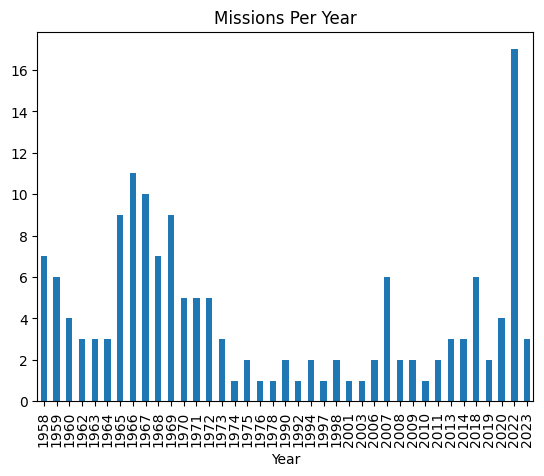

In [4]:
df['Year'] = df['Launch Date'].dt.year
missions_per_year = df['Year'].value_counts().sort_index()
missions_per_year.plot(kind='bar', title='Missions Per Year')


# 2. Which countries/agencies conducted the most moon missions?<!-- Largest (h1) -->

<Axes: title={'center': 'Missions by Operator'}, xlabel='Operator'>

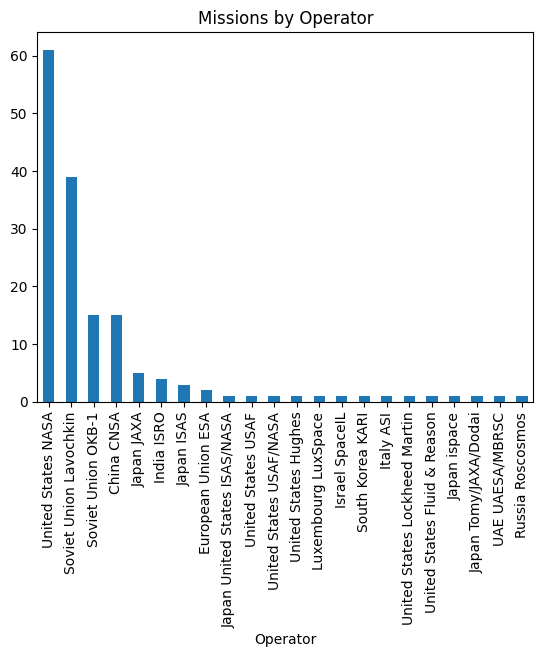

In [6]:
df['Operator'].value_counts().plot(kind='bar', title='Missions by Operator')


# 3. What are the success and failure rates of moon missions?<!-- Largest (h1) -->

<Axes: title={'center': 'Mission Outcome Distribution'}, ylabel='proportion'>

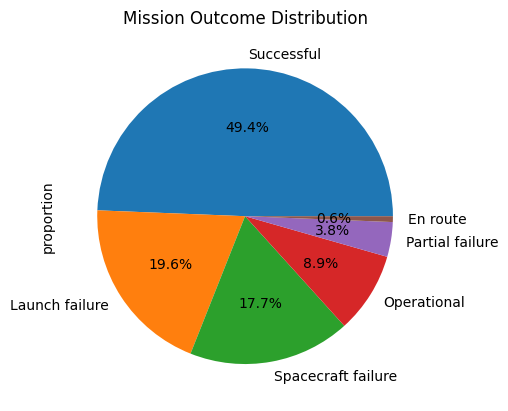

In [7]:
df['Outcome'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', title='Mission Outcome Distribution')


# 4. Which rockets were most frequently used?<!-- Largest (h1) -->

<Axes: title={'center': 'Top 10 Most Used Rockets'}, ylabel='Carrier Rocket'>

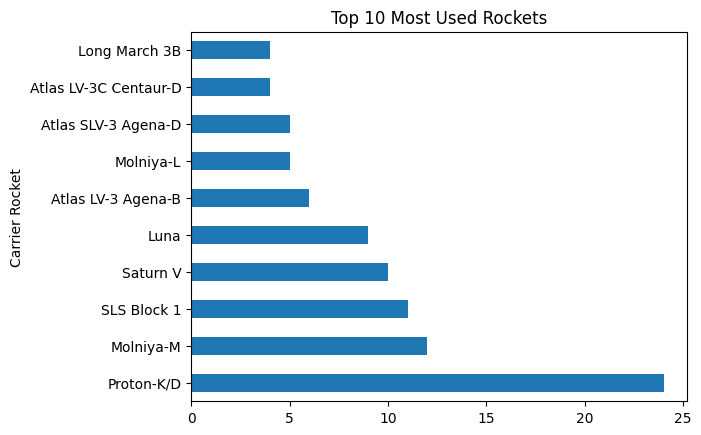

In [11]:
df['Carrier Rocket'].value_counts().head(10).plot(kind='barh', title='Top 10 Most Used Rockets')


# 5. Which spacecraft had repeated missions (reusability or common models)?<!-- Largest (h1) -->

<Axes: title={'center': 'Most Used Spacecraft Models'}, xlabel='Spacecraft'>

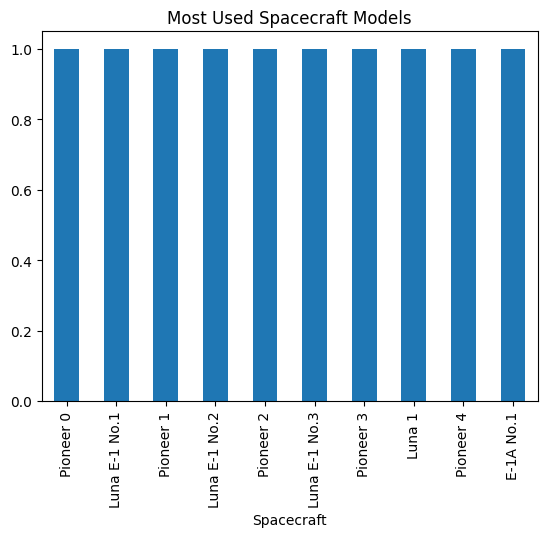

In [13]:
df['Spacecraft'].value_counts().head(10).plot(kind='bar', title='Most Used Spacecraft Models')


# 6. Which operator had the highest mission success rate?<!-- Largest (h1) -->

<Axes: title={'center': 'Mission Success Rate by Operator'}, xlabel='Operator'>

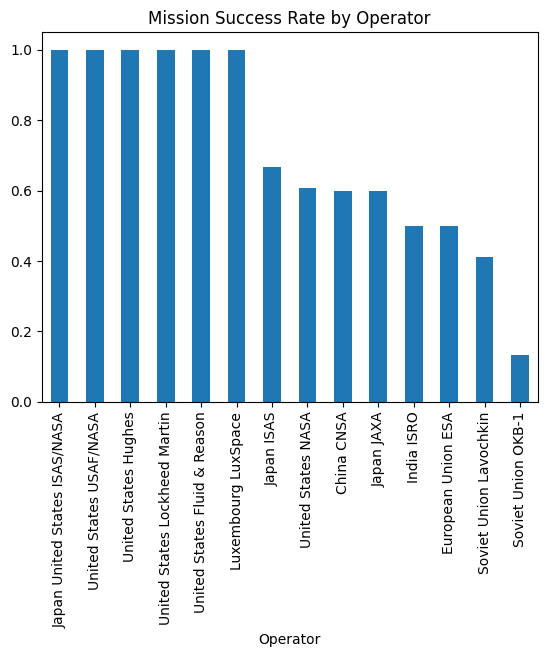

In [15]:
success_df = df[df['Outcome'].str.lower().str.contains('success')]
total_by_operator = df['Operator'].value_counts()
success_by_operator = success_df['Operator'].value_counts()
success_rate = (success_by_operator / total_by_operator).dropna().sort_values(ascending=False)
success_rate.plot(kind='bar', title='Mission Success Rate by Operator')


# 7. Trends in successful missions over time?<!-- Largest (h1) -->

<Axes: title={'center': 'Success Rate Over Time'}, xlabel='Year'>

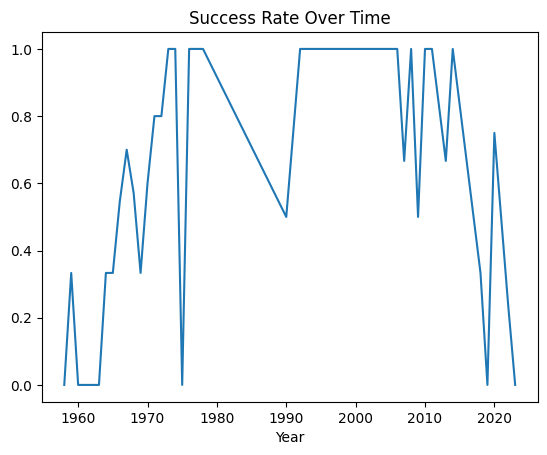

In [17]:
df['Success'] = df['Outcome'].str.lower().str.contains('success')
success_trend = df.groupby('Year')['Success'].mean()
success_trend.plot(title='Success Rate Over Time')


# 8. Any correlation between mission type and outcome? <!-- Largest (h1) -->

<Axes: title={'center': 'Outcome by Mission Type'}, xlabel='Mission Type'>

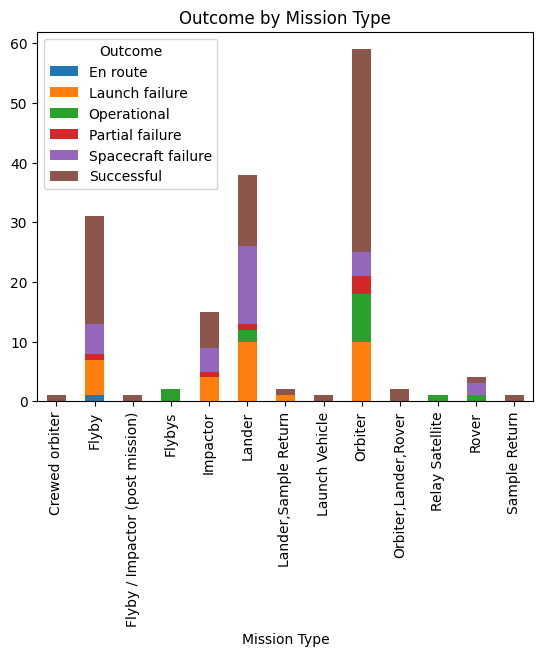

In [19]:
pd.crosstab(df['Mission Type'], df['Outcome']).plot(kind='bar', stacked=True, title='Outcome by Mission Type')
